<!-- ──────────────────────────────────────────────────────────────────────────── -->
<!--  Wilson–Cowan Excitatory–Inhibitory Oscillator – HTML description          -->
<!--  Copy this entire block into a Jupyter‑Lab / IPython Markdown cell.        -->
<!-- ──────────────────────────────────────────────────────────────────────────── -->

<h2>Wilson–Cowan Excitatory–Inhibitory Oscillator</h2>

<p>
  The Wilson–Cowan model is a compact nonlinear dynamical system that captures
  the mean‑field activity of a local cortical circuit with one
  <em>excitatory</em> (E) and one <em>inhibitory</em> (I) neuronal
  population.  It accounts for self‑sustained rhythms (e.g.&nbsp;β/γ
  oscillations) through the interplay of recurrent excitation, delayed
  inhibition, and a saturating neuronal transfer function.
</p>

<h3>1&nbsp;·&nbsp;Model Equations</h3>

<p>
    \begin{aligned}
      \tau_E \,\dot E(t) &= -E(t)
        + S_E\!\bigl(w_{EE}\,E(t) \;-\; w_{EI}\,I(t) \;+\; P_E\bigr),\\[6pt]
      \tau_I \,\dot I(t) &= -I(t)
        + S_I\!\bigl(w_{IE}\,E(t) \;-\; w_{II}\,I(t) \;+\; P_I\bigr).
    \end{aligned}
</p>

<ul>
  <li>
    <strong>State variables</strong>:<br>
    &nbsp;&nbsp;&bull;&nbsp;<span style="white-space:nowrap;">\(E(t)\)</span> – mean firing rate of excitatory cells<br>
    &nbsp;&nbsp;&bull;&nbsp;<span style="white-space:nowrap;">\(I(t)\)</span> – mean firing rate of inhibitory cells
  </li>
  <li>
    <strong>Time constants</strong>:<br>
    &nbsp;&nbsp;\( \tau_E, \tau_I \) – membrane / synaptic integration times
  </li>
  <li>
    <strong>Synaptic weights</strong>:<br>
    \(w_{ab}\) is the strength of input from population <em>b</em> to
    population <em>a</em>.
  </li>
  <li>
    <strong>External drives</strong>:<br>
    \(P_E, P_I\) represent tonic or stimulus‑locked inputs.
  </li>
</ul>

<h3>2&nbsp;·&nbsp;Nonlinearity</h3>

<p>
  Transfer functions convert synaptic input to firing rate:
  \[
    S_{E,I}(x) \;=\;
    \frac{1}{\,1 + \exp\!\bigl[-a_{E,I}\,(x - \theta_{E,I})\bigr] }.
  \]
  The sigmoidal form introduces gain control at threshold
  \( \theta_{E,I} \) and saturates as inputs grow, making the right‑hand side
  <em>non‑affine</em> and allowing bifurcations to oscillatory states.
</p>

<h3>3&nbsp;·&nbsp;Dynamics &amp; Hopf Bifurcation</h3>

<p>
  Linearising around a fixed point \( (E^\*, I^\*) \) gives the Jacobian
  \[
    J =
    \begin{pmatrix}
      -\dfrac{1}{\tau_E} + \dfrac{w_{EE}}{\tau_E} S_E' &
      -\dfrac{w_{EI}}{\tau_E} S_E' \\[10pt]
      \dfrac{w_{IE}}{\tau_I} S_I' &
      -\dfrac{1}{\tau_I} - \dfrac{w_{II}}{\tau_I} S_I'
    \end{pmatrix}_{(E^\*,I^\*)}.
  \]
  A <em>super‑critical Hopf bifurcation</em> occurs when
  <span style="white-space:nowrap;">\(\operatorname{Tr}J = 0\)</span> and
  \(\det J &gt; 0\), converting a stable fixed point into a
  self‑sustained limit cycle.  Competing positive feedback
  <span style="white-space:nowrap;">(E&nbsp;&rarr;&nbsp;E)</span> and delayed
  negative feedback
  <span style="white-space:nowrap;">(E&nbsp;&rarr;&nbsp;I&nbsp;&rarr;&nbsp;E)</span>
  set the oscillation frequency, often in the γ‑band for cortical
  parameter values.
</p>

<h3>4&nbsp;·&nbsp;Example Parameter Set</h3>

<table border="1" cellpadding="4" style="border-collapse:collapse;">
  <thead>
    <tr><th>Parameter</th><th>Value</th><th>Comment</th></tr>
  </thead>
  <tbody>
    <tr><td>\(\tau_E\)</td><td>10&nbsp;ms</td><td>fast AMPA‑like excitation</td></tr>
    <tr><td>\(\tau_I\)</td><td>20&nbsp;ms</td><td>slower GABA<sub>A</sub> inhibition</td></tr>
    <tr><td>\(w_{EE}\)</td><td>12</td><td>recurrent excitation</td></tr>
    <tr><td>\(w_{EI}\)</td><td>15</td><td>inhibitory feedback strength</td></tr>
    <tr><td>\(w_{IE}\)</td><td>10</td><td>E&nbsp;&rarr;&nbsp;I drive</td></tr>
    <tr><td>\(w_{II}\)</td><td>2</td><td>self‑inhibition</td></tr>
    <tr><td>\(P_E\)</td><td>1.5</td><td>tonic excitatory input</td></tr>
    <tr><td>\(P_I\)</td><td>0.5</td><td>tonic inhibitory drive</td></tr>
  </tbody>
</table>

<p style="margin-top:0.8em;">
  With these values the model produces ~40&nbsp;Hz oscillations reminiscent of
  cortical γ‑rhythms.  Tweaking \(w_{EE}\) or \(P_E\) can shift the system
  into fixed‑point, damped‑oscillation, or high‑amplitude β‑like regimes.
</p>

<h3>5&nbsp;·&nbsp;Key Take‑aways</h3>

<ul>
  <li>
    Minimal two‑variable model that still exhibits rich nonlinear behaviour
    through a Hopf bifurcation.
  </li>
  <li>
    Captures the essential <em>excitation–inhibition balance</em> driving
    brain rhythms.
  </li>
  <li>
    Serves as a building block for larger‑scale models (e.g.&nbsp;coupled
    cortical columns, thalamocortical loops, or phase‑reduced Kuramoto
    networks).
  </li>
</ul>

<!-- ──────────────────────────────────────────────────────────────────────────── -->


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

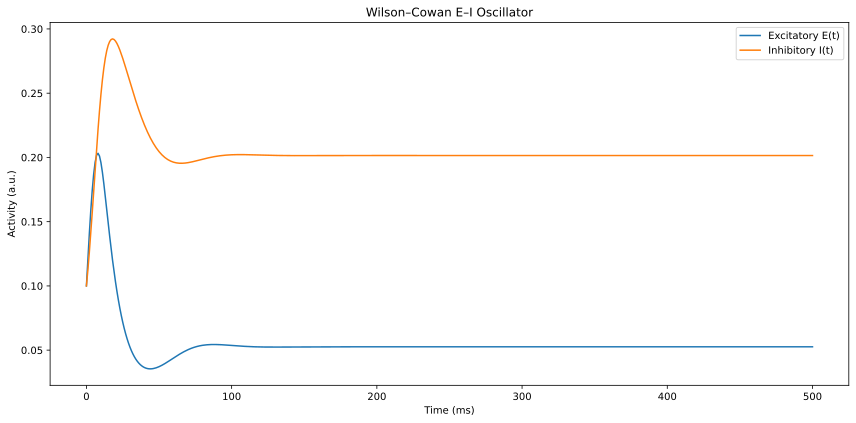

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ------------------------------------------------------------------
# 1. Helper: sigmoidal transfer function (shared by E and I)
# ------------------------------------------------------------------
def S(x, a=1.0, theta=2.0):
    """Soft‑threshold firing‑rate nonlinearity."""
    return 1.0 / (1.0 + np.exp(-a * (x - theta)))

# ------------------------------------------------------------------
# 2. Right‑hand side of the two‑population Wilson–Cowan model
# ------------------------------------------------------------------
def wc_rhs(t, y, p):
    """
    y = [E, I]
    p = [wEE, wEI, wIE, wII, PE, PI, tauE, tauI]
    """
    E, I = y
    wEE, wEI, wIE, wII, PE, PI, tauE, tauI = p

    dE = (-E + S(wEE * E - wEI * I + PE)) / tauE
    dI = (-I + S(wIE * E - wII * I + PI)) / tauI
    return [dE, dI]

# ------------------------------------------------------------------
# 3. Reference parameter set that yields γ‑oscillations
# ------------------------------------------------------------------
params = [12.0, 15.0, 10.0, 2.0,      # synaptic weights
          1.5, 0.5,                   # external drives
          0.010, 0.020]               # time‑constants (s)

# ------------------------------------------------------------------
# 4. Numerical integration
# ------------------------------------------------------------------
t0, tf = 0.0, 0.5          # integrate 0.5 s (500 ms)
y0 = [0.1, 0.1]            # small initial firing rates
sol = solve_ivp(wc_rhs, (t0, tf), y0, args=(params,), max_step=1e-3)

# ------------------------------------------------------------------
# 5. Plot the firing‑rate traces
# ------------------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(sol.t * 1e3, sol.y[0], label='Excitatory E(t)')
plt.plot(sol.t * 1e3, sol.y[1], label='Inhibitory I(t)')
plt.xlabel('Time (ms)')
plt.ylabel('Activity (a.u.)')
plt.title('Wilson–Cowan E–I Oscillator')
plt.legend()
plt.tight_layout()
plt.show()

<!-- ──────────────────────────────────────────────────────────────────────────── -->
<!--  Mixed‑Mode Oscillations & Bursting in an Extended Wilson–Cowan Circuit    -->
<!--  Copy this entire block into an IPython Markdown cell (HTML is supported). -->
<!-- ──────────────────────────────────────────────────────────────────────────── -->

<h2>Mixed‑Mode Oscillations (MMOs) &amp; Bursting</h2>
<p><em>Adding a slow negative‑feedback loop to the Wilson–Cowan E–I oscillator</em></p>

<h3>1&nbsp;·&nbsp;Three‑variable model</h3>

<p>
\[
\begin{aligned}
\tau_E\,\dot E &= -E + S_E\!\bigl(w_{EE}E - w_{EI}I - g_S\,S + P_E\bigr),\\[4pt]
\tau_I\,\dot I &= -I + S_I\!\bigl(w_{IE}E - w_{II}I + P_I\bigr),\\[4pt]
\tau_S\,\dot S &= -S + \kappa\,E .
\end{aligned}
\]
</p>

<table border="1" cellpadding="4" style="border-collapse:collapse;">
  <thead><tr><th>Variable / Parameter</th><th>Meaning</th><th>Typical value</th></tr></thead>
  <tbody>
    <tr><td><span style="white-space:nowrap;">\(E(t)\)</span></td><td>Excitatory‑population firing rate</td><td>0–1&nbsp;(norm.)</td></tr>
    <tr><td><span style="white-space:nowrap;">\(I(t)\)</span></td><td>Inhibitory‑population firing rate</td><td>0–1</td></tr>
    <tr><td><span style="white-space:nowrap;">\(S(t)\)</span></td><td>Slow fatigue / adaptation variable</td><td>—</td></tr>
    <tr><td>\(\tau_E,\tau_I\)</td><td>Fast time constants</td><td>10–20&nbsp;ms</td></tr>
    <tr><td>\(\tau_S\)</td><td>Slow time constant</td><td>200–500&nbsp;ms</td></tr>
    <tr><td>\(g_S\)</td><td>Strength of slow inhibition onto \(E\)</td><td>2–6</td></tr>
    <tr><td>\(\kappa\)</td><td>Accumulation rate of fatigue</td><td>0.3–0.8</td></tr>
  </tbody>
</table>

<h3>2&nbsp;·&nbsp;Slow–fast interpretation</h3>
<ul>
  <li><strong>Fast subsystem</strong> (\(E,I\)) for frozen \(S\) behaves like the classic Wilson–Cowan oscillator.</li>
  <li><strong>Critical manifold</strong>: fixed‑point set of the fast subsystem parametrised by \(S\).</li>
  <li>Trajectories drift slowly along a stable branch until a fold (saddle‑node) is reached &rarr; fast jump to high‑activity state (burst onset).</li>
  <li>During the burst, \(E\) is large, \(S\) builds up; once it crosses a Hopf/fold on the upper branch &rarr; jump back &rarr; cycle repeats.</li>
  <li>The interplay of small γ‑frequency spikes inside large, slow envelopes produces the hallmark <em>mixed‑mode oscillations</em>.</li>
</ul>

<h3>3&nbsp;·&nbsp;Physiological mapping</h3>
<ul>
  <li>\(S\) &asymp; Ca<sup>2+</sup>/Na<sup>+</sup>‑dependent K<sup>+</sup> current, M‑current, or vesicle depletion.</li>
  <li>Model reproduces cortical Up/Down states, thalamic spindle waxing–waning, basal‑ganglia β bursts, etc.</li>
</ul>

<h3>4&nbsp;·&nbsp;Example bursting regime</h3>
<p>
&nbsp;&nbsp;\(\tau_E=10\text{ ms},\; \tau_I=20\text{ ms},\; \tau_S=200\text{ ms},\;<br>
w_{EE}=12,\; w_{EI}=15,\; w_{IE}=10,\; w_{II}=2,\;<br>
g_S=4,\; \kappa=0.6,\; P_E=1.5,\; P_I=0.5\)
</p>
<p>
Produces ≈5 Hz envelopes containing 3–5 γ‑cycles each—a textbook MMO burst.
</p>

<!-- ──────────────────────────────────────────────────────────────────────────── -->


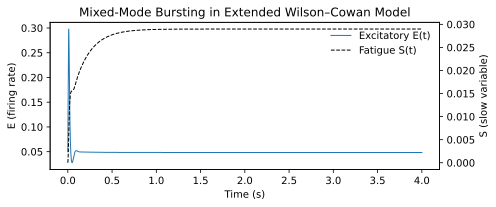

In [4]:
# ─────────────────────────────────────────────────────────────────────────────
#  Python implementation: Extended Wilson–Cowan model with slow fatigue
# ─────────────────────────────────────────────────────────────────────────────
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 1. Sigmoidal transfer function --------------------------------------------------
def S(x, a=1.0, theta=2.0):
    return 1.0 / (1.0 + np.exp(-a * (x - theta)))

# 2. RHS of the 3‑variable slow‑fast system --------------------------------------
def wc_slow_rhs(t, y, p):
    E, I, S_var = y
    (wEE, wEI, wIE, wII,
     PE, PI, gS, kappa,
     tauE, tauI, tauS) = p

    dE = (-E + S(wEE * E - wEI * I - gS * S_var + PE)) / tauE
    dI = (-I + S(wIE * E - wII * I + PI)) / tauI
    dS = (-S_var + kappa * E) / tauS
    return [dE, dI, dS]

# 3. Parameter set that yields mixed‑mode bursting -------------------------------
params = [12.0, 15.0, 10.0, 2.0,   # weights wEE, wEI, wIE, wII
          1.5, 0.5,                # external drives PE, PI
          4.0, 0.6,                # gS, kappa
          0.010, 0.020, 0.200]     # tauE, tauI, tauS  (seconds)

# 4. Integrate for 4 seconds ------------------------------------------------------
t_span = (0.0, 4.0)
y0 = [0.05, 0.05, 0.0]            # initial E, I, S
sol = solve_ivp(wc_slow_rhs, t_span, y0, args=(params,),
                max_step=1e-3, rtol=1e-6, atol=1e-9)

# 5. Plot results: E(t) and S(t) --------------------------------------------------
fig, ax1 = plt.subplots(figsize=(7, 3))

ax1.plot(sol.t, sol.y[0], lw=1.0, label='Excitatory E(t)')
ax1.set_ylabel('E (firing rate)')
ax1.set_xlabel('Time (s)')

ax2 = ax1.twinx()
ax2.plot(sol.t, sol.y[2], 'k--', lw=1.0, label='Fatigue S(t)')
ax2.set_ylabel('S (slow variable)', color='k')
ax2.tick_params(axis='y', colors='k')

lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', frameon=False)
plt.title('Mixed‑Mode Bursting in Extended Wilson–Cowan Model')
plt.tight_layout()
plt.show()


<!-- ──────────────────────────────────────────────────────────────────────────── -->
<!--  Synchronization & Chimera States in a Network of Wilson–Cowan Modules     -->
<!--  Paste this block into a Markdown cell                                      -->
<!-- ──────────────────────────────────────────────────────────────────────────── -->

<h2>Synchronization &amp; Chimera States in Neural Oscillator Networks</h2>

<p>
  Near a super‑critical Hopf bifurcation every Wilson–Cowan (WC) E–I module
  can be phase‑reduced to a single oscillator
  \( \phi_i(t) \in [0,2\pi) \) with natural frequency \( \omega \).
  Weak, non‑local synaptic coupling between modules on a 1‑D ring leads to
  the Kuramoto–Sakaguchi–type network
</p>

<p>
\[
  \dot{\phi}_i \;=\;
  \omega \;+\;
  \frac{K}{2R}
  \sum_{j = i-R}^{i+R}
  \sin\!\bigl(\phi_j - \phi_i - \alpha\bigr),
  \qquad i = 1,\dots,N.
\]
</p>

<ul>
  <li>\(N\) – number of WC units arranged on a ring (periodic boundary).</li>
  <li>\(R\) – coupling range (each oscillator sees \(2R\) neighbours).</li>
  <li>\(K\) – coupling strength; \(K&gt;0\) favours synchrony.</li>
  <li>\(\alpha\) – Sakaguchi phase lag
      (models axonal delays or synaptic kinetics; breaks pure in‑phase lock).</li>
</ul>

<h3>Why chimeras?</h3>
<ol>
  <li>For \(\alpha\!=\!0\) the in‑phase synchronous state is globally stable
      (Kuramoto theorem).</li>
  <li>A finite lag (\(\alpha\!\approx\!1.4\;\text{rad}\)) frustrates complete
      synchrony, yet interactions are not strong enough to randomise the whole
      ring.</li>
  <li>Result: one (or several) domains lock in phase
      (<em>coherent cluster</em>) while the rest drift incoherently
      (<em>incoherent sea</em>) – the classical
      <strong>chimera state</strong>.</li>
</ol>

<h3>Parameter regime producing a single‑headed chimera</h3>

<table border="1" cellpadding="4" style="border-collapse:collapse;">
  <thead><tr><th>Symbol</th><th>Value</th><th>Comment</th></tr></thead>
  <tbody>
    <tr><td>\(N\)</td><td>256</td><td>oscillators</td></tr>
    <tr><td>\(R/N\)</td><td>0.35</td><td>non‑local coupling radius</td></tr>
    <tr><td>\(K\)</td><td>1.2</td><td>coupling strength</td></tr>
    <tr><td>\(\alpha\)</td><td>1.46 rad&nbsp;≈&nbsp;83.7°</td><td>phase lag</td></tr>
    <tr><td>\(\omega\)</td><td>2π ⋅ 40 Hz</td><td>matches WC γ‑limit‑cycle</td></tr>
  </tbody>
</table>

<h3>Observable</h3>

<p>
  A convenient diagnostic is the <em>local order parameter</em>
  \( \rho_i(t) = \bigl|\frac{1}{2R}\sum_{|j-i|\le R}
  e^{\mathrm i\phi_j(t)}\bigr| \in [0,1] \).
  <br>
  &bull; \( \rho_i\simeq1 \) inside synchronized patches.  
  <br>
  &bull; \( \rho_i\lt1 \) where oscillators drift (desynchronized).
</p>

<h3>Relation to biology</h3>
<ul>
  <li>Cortical columns or laminar microcircuits coupled by patchy
      long‑range excitatory axons.</li>
  <li>Visual cortex “pinwheel” domains exhibiting partial coherence in
      optical imaging.</li>
  <li>Chimera‑like focal seizures: synchronized seizure core surrounded by
      incoherent penumbra.</li>
</ul>

<!-- ──────────────────────────────────────────────────────────────────────────── -->


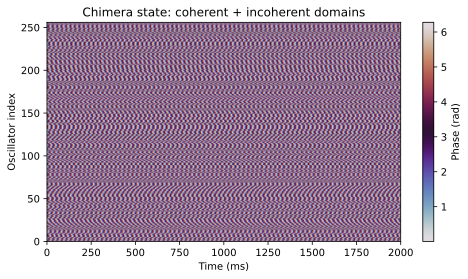

In [5]:
# ─────────────────────────────────────────────────────────────────────────────
#  Python demo – Ring of non‑locally coupled phase oscillators
#  Shows a chimera state with coherent + incoherent domains.
# ─────────────────────────────────────────────────────────────────────────────
import numpy as np
import matplotlib.pyplot as plt

# ----------------- 1. Network definition ------------------------------------
N = 256                 # number of oscillators
R = int(0.35 * N)       # coupling radius
K = 1.2                 # coupling strength
alpha = 1.46            # Sakaguchi phase lag (radians)
omega = 2 * np.pi * 40  # intrinsic gamma frequency (rad/s)

# Discrete convolution kernel (top‑hat)
kernel = np.zeros(N)
kernel[1:R+1] = 1
kernel[-R:] = 1         # periodic ring
kernel = kernel / (2 * R)  # normalise for later use (average)

# ----------------- 2. Simulation parameters ---------------------------------
dt = 0.0005             # 0.5 ms
T  = 2.0                # 2 seconds total
steps = int(T / dt)
t   = np.linspace(0, T, steps)

# Random initial phases with a slight gradient seed (helps reproducibility)
phi = 2*np.pi*np.random.rand(N) + 2*np.pi*np.arange(N)/N

# Record every 5 ms for plotting
skip = int(0.005 / dt)
snapshots = np.empty((steps//skip, N))

# ----------------- 3. Time integration (Euler) ------------------------------
for k in range(steps):
    # Convolution using FFT (periodic boundary)
    eiphi = np.exp(1j * phi)
    coupling = np.real(np.fft.ifft(np.fft.fft(eiphi) * np.fft.fft(kernel)))
    dphi = omega + K * coupling * np.sin(-alpha) - K * np.sin(phi) * np.cos(alpha)
    phi += dt * dphi
    if k % skip == 0:
        snapshots[k//skip] = np.mod(phi, 2*np.pi)

# ----------------- 4. Plot space‑time diagram -------------------------------
fig, ax = plt.subplots(figsize=(7, 4))
im = ax.imshow(snapshots.T, aspect='auto', cmap='twilight',
               extent=[0, T*1000, 0, N], origin='lower')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Oscillator index')
ax.set_title('Chimera state: coherent + incoherent domains')
plt.colorbar(im, ax=ax, label='Phase (rad)')
plt.tight_layout()
plt.show()
